In [1]:
#QUESTION 03
import numpy as np
import csv
from numpy import linalg as LA
import matplotlib.pyplot as plt
from numpy.random import default_rng
import math

rows = []
age = []
cost = []

#reading the data from csv file
with open("dataset.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
        age.append(int(row[0])) 
        cost.append(float(row[6]))

Plotting the data before normalizing: 


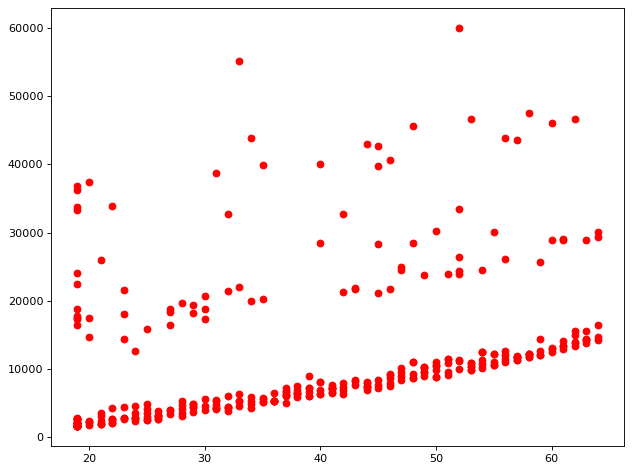

In [2]:
#Plotting the data
print("Plotting the data before normalizing: ")
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
ax.plot(age, cost, 'ro')

In [3]:
#normalization
x = age
y = cost
x_norm = ((x - np.min(x)) / (np.max(x) - np.min(x)))
y_norm = ((y - np.min(y)) / (np.max(y) - np.min(y)))

Plotting the data after normalizing: 


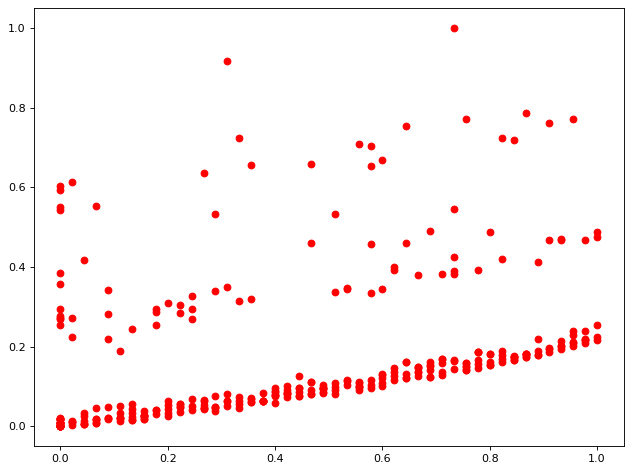

In [4]:
#plot the data
print("Plotting the data after normalizing: ")
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
ax.plot(x_norm, y_norm, 'ro')

In [5]:
#Convariance computing function
def covariance(X):
    
    x_mean = np.full((X[0].shape[0],),fill_value = np.mean(X[0]))
    
    y_mean = np.full((X[1].shape[0],),fill_value = np.mean(X[1]))
    
    #Compute X-X^bar
    X_bar = np.stack((x_mean,y_mean),axis=0)
    
    #Compute covariance matrix
    C = ((X-X_bar).dot(np.transpose(X-X_bar)))/(X.shape[1])
    
    return C

Eigen Vector 1:  [0.95881596 0.28402809]
Eigen Vector 2:  [-0.28402809  0.95881596]


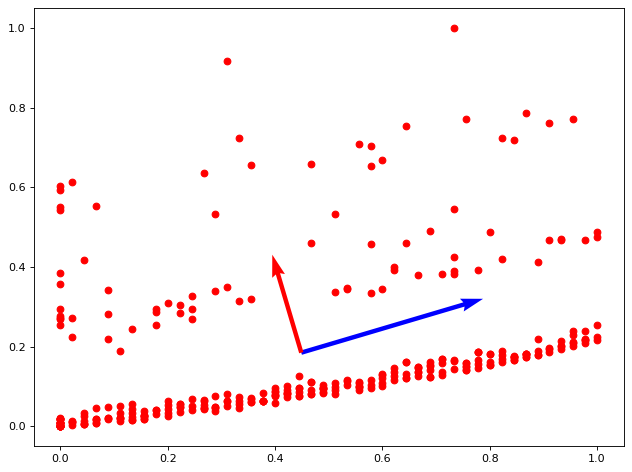

In [6]:
#plot eigen vetors
X = np.stack((x_norm,y_norm),axis=0)
val, vec = LA.eig(covariance(X))
eig_vec1 = vec[:,0]
eig_vec2 = vec[:,1]

print("Eigen Vector 1: ",eig_vec1)
print("Eigen Vector 2: ",eig_vec2)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
ax.plot(x_norm, y_norm, 'ro')
plt.quiver(np.mean(x_norm), np.mean(y_norm), eig_vec1[0], eig_vec1[1], color=['b'], scale=1/np.sqrt(val[0]))
plt.quiver(np.mean(x_norm), np.mean(y_norm), eig_vec2[0], eig_vec2[1], color=['r'], scale=1/np.sqrt(val[1]))
plt.show()

In [7]:
#Linear least square function
def linear_least_square(Xin,Yin):
    
    x_array = np.asarray(Xin)
    y_array = np.asarray(Yin)
    
    X = np.reshape(x_array,(x_array.shape[0],1))
    Y = np.reshape(y_array,(y_array.shape[0],1))
    n = X.shape[0]
    
    # padding X with ones
    X_final = np.append( X, np.ones((n,1)), axis = 1 )
    
    #computing inverse of (X^T*X)
    XTX = np.linalg.inv(X_final.transpose().dot(X_final))
    
    #computing X^T*Y
    XTY = (X_final.transpose()).dot(Y)
    
    #Computing B
    B = XTX.dot(XTY)
    
    #Computing the equation
    Y_plot = X_final.dot(B)
    
    #Plotting least square method
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(111)
    ax.plot(x_array, y_array, 'ro')
    ax.plot(x_array, Y_plot, 'k--')
    ax.set_title("LINEAR LEAST SQUARE CURVE")
    
    return B

In [8]:
#total least square function
def total_least_square(X,Y):
    
    #Compute the mean
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    
    Y_X = np.sum((Y - y_mean)**2) - np.sum((X - x_mean)**2)
    
    XY = 2 * (np.sum((X - x_mean).dot(Y - y_mean)))

    SQRT = (Y_X + (np.sqrt((Y_X**2) + (XY**2)))) / XY
    
    A = y_mean - SQRT * x_mean
    
    return X, X*SQRT + A
    

In [9]:
#Ransac function
def ransac(X,Y):
    
    N = math.inf
    sample_count = 2
    iterations = 0
    threshold = 500
    
    e = 0.5
    p = 0.95
    best_model= None
    
    combined_data = np.column_stack((X,Y))
    data_size = combined_data.shape[0]
    
    while N>iterations:
        
        np.random.shuffle(combined_data)
        
        sample_data = combined_data[:sample_count,:]
        
        est_model = linear_least_square(sample_data[:,0], sample_data[:,1])
        
        X_array = np.vstack((np.array(X), np.ones((len(X)))))
        
        y_est = (np.transpose(X_array)).dot(est_model)
        
        t = np.abs(Y-y_est[:,0])
        
        inliner_count = np.count_nonzero(t<threshold)
        if inliner_count == 0:
            continue

        e = 1 - (inliner_count/data_size)
         
        N = np.log(e)/np.log(1-(1-e)**2)
        
        iterations += 1
        
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot()
    ax.plot(age, cost, 'ro')    
    ax.plot(X, y_est, 'b-') 
    ax.set_title("RANSAC CURVE")
    
    
    return est_model

array([[0.20501265],
       [0.09285297]])

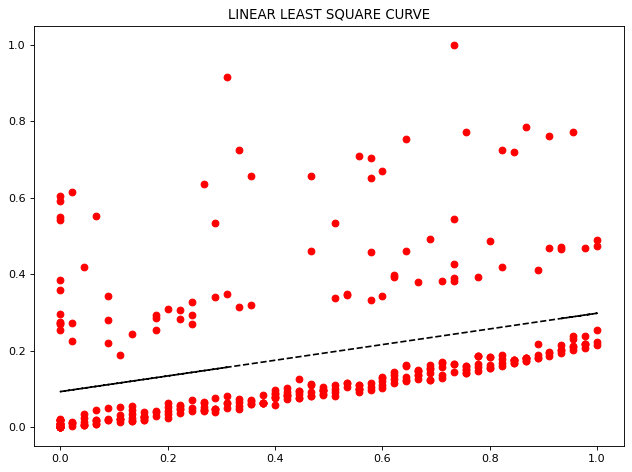

In [10]:
#Calling linear least square method
linear_least_square(x_norm,y_norm)

Text(0.5, 1.0, 'TOTAL LEAST SQUARE CURVE')

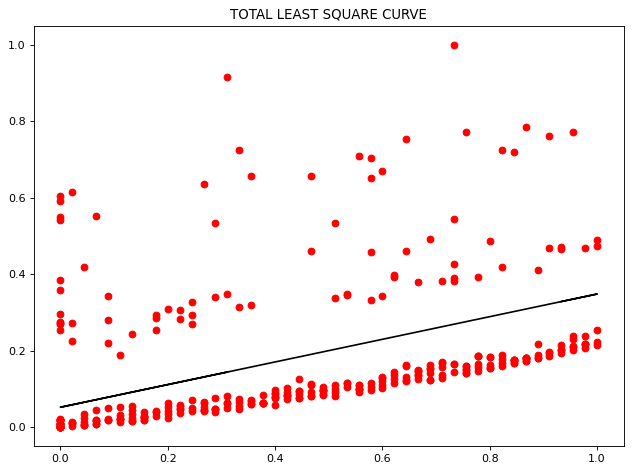

In [11]:
#Calling total least square method
x_values, y_values = total_least_square(x_norm, y_norm)
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
ax.plot(x_norm, y_norm, 'ro')    
ax.plot(x_values, y_values, 'k-')
ax.set_title("TOTAL LEAST SQUARE CURVE")

array([[  280.73119375],
       [-4834.147175  ]])

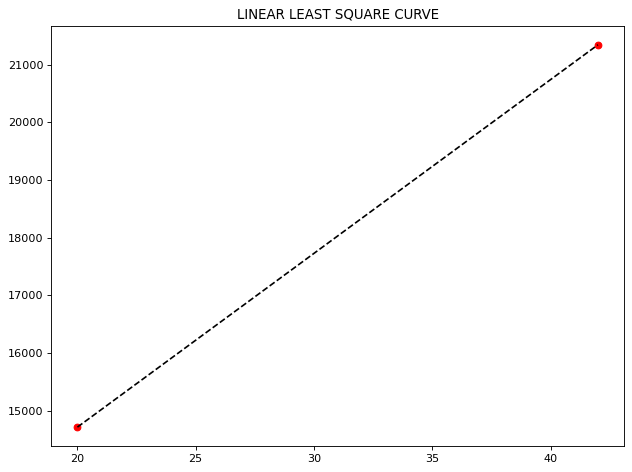

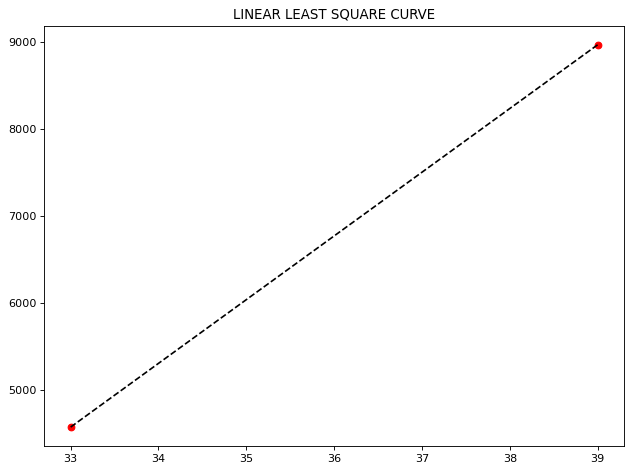

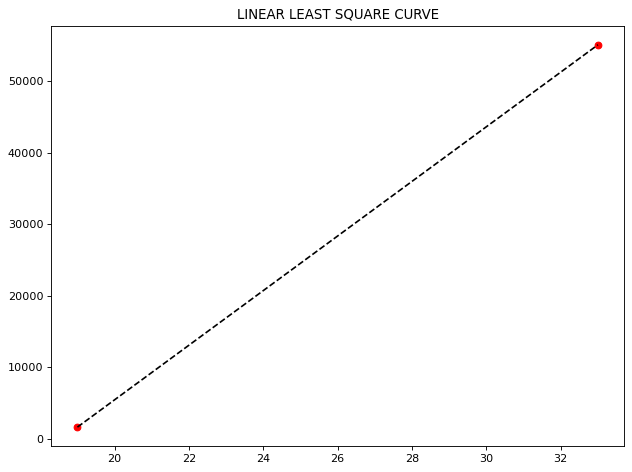

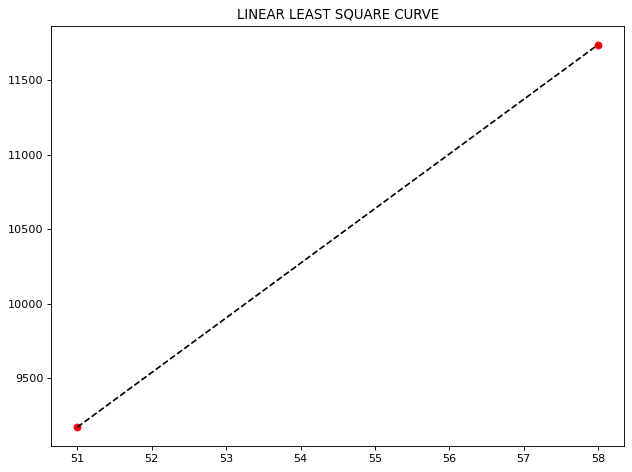

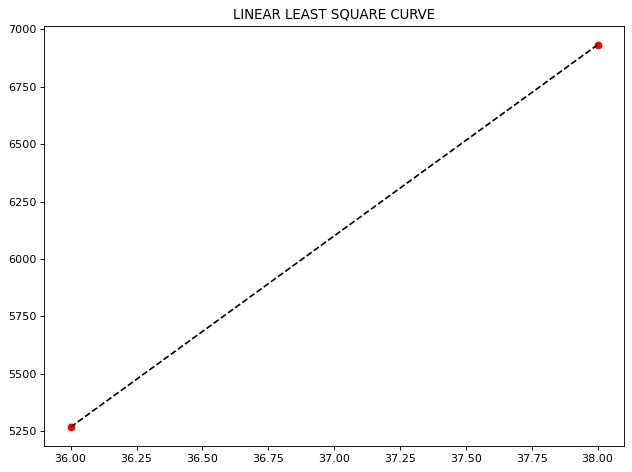

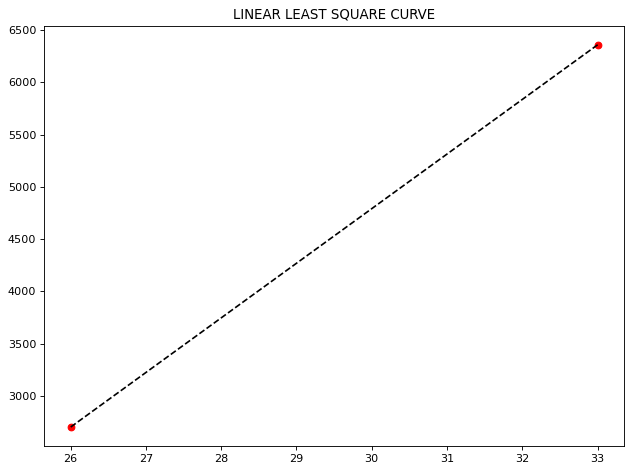

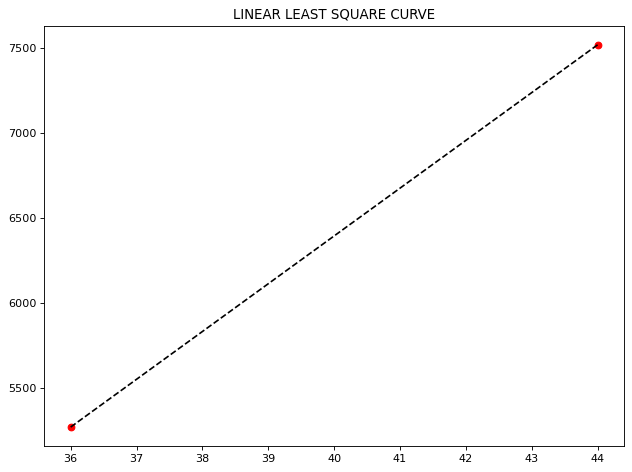

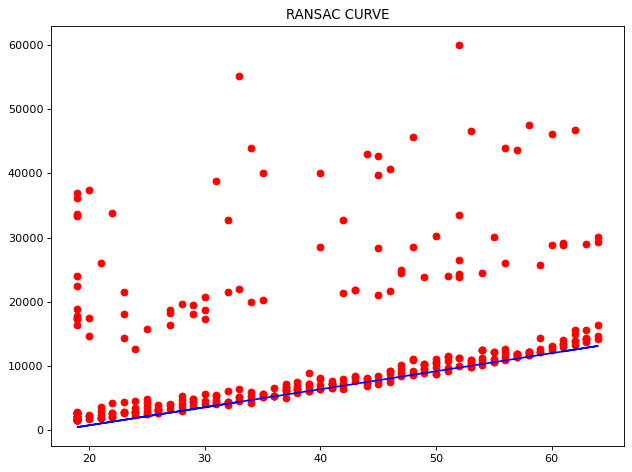

In [12]:
#Calling ransac function
ransac(age,cost)
#Please scroll to bottom to find RANSAC plot
#if singular matrix error comes up, please re run this cell